In [1]:
# https://blog.csdn.net/weixin_40801364/article/details/100606084

# 1.加载工具包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import sys
# Jupyter代码 和 数据 在IDEA路径中；导入的自定义库是Anaconda路径中的库。 
# os.chdir设置之后，os.path.xxx、os.getcwd()也会变为该路径（注意：os.chdir(r"E:)不生效）
os.chdir(r"E:\code\python_workSpace\idea_space")

print(os.getcwd()) 
print(os.path.abspath(os.getcwd()))
# print(sys.path)
'''
os.getcwd() 默认为执行代码的路径，但会跟随 os.chdir(xxx)的设置而变化。
os.path.dirname() 只会退到盘符目录就停止了（如：退到E盘符目录就停止，多余的os.path.dirname()忽略）
'''
BASE_DIR = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(os.getcwd()))))
print(BASE_DIR)
sys.path.insert(0, os.path.join(BASE_DIR, r"E:\soft\Anaconda\Anaconda_Python3.6_code\data_analysis\101_Sklearn\7_SVM"))
print(sys.path)

import FeatureTools as ft
import Tools_customize as tc
import Binning_tools as bt

E:\code\python_workSpace\idea_space
E:\code\python_workSpace\idea_space
E:\
['E:\\soft\\Anaconda\\Anaconda_Python3.6_code\\data_analysis\\101_Sklearn\\7_SVM', 'c:\\python\\python36\\python36.zip', 'c:\\python\\python36\\DLLs', 'c:\\python\\python36\\lib', 'c:\\python\\python36', '', 'c:\\python\\python36\\lib\\site-packages', 'c:\\python\\python36\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\dell\\.ipython']


In [2]:
# 加载优衣库文件：
# 当前路径为：E:\code\python_workSpace\idea_space，所以需要添加文件路径
UNIQLO=pd.read_csv(r'zoubo\4_DataVisualization\3_XiaoDu\10_home_work\1_L2W1.csv')
# 清理数据，描述性语句查看缺失值，去掉销售额为负数的结果
UNIQLO.head()

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost
0,658,深圳,线下,Female,25-29,Weekday,当季新品,4,796.0,4,4,59
1,146,杭州,线下,Female,25-29,Weekday,运动,1,149.0,1,1,49
2,70,深圳,线下,Male,>=60,Weekday,T恤,2,178.0,2,2,49
3,658,深圳,线下,Female,25-29,Weekday,T恤,1,59.0,1,1,49
4,229,深圳,线下,Male,20-24,Weekend,袜子,2,65.0,2,3,9


In [3]:
UNIQLO.info() # 无缺失值
UNIQLO.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22293 entries, 0 to 22292
Data columns (total 12 columns):
store_id        22293 non-null int64
city            22293 non-null object
channel         22293 non-null object
gender_group    22293 non-null object
age_group       22293 non-null object
wkd_ind         22293 non-null object
product         22293 non-null object
customer        22293 non-null int64
revenue         22293 non-null float64
order           22293 non-null int64
quant           22293 non-null int64
unit_cost       22293 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 2.0+ MB


,store_id,customer,revenue,order,quant,unit_cost
count,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000
mean,335.391558,1.629480,159.531371,1.651998,1.858072,46.124658
std,230.236167,1.785605,276.254066,1.861480,2.347301,19.124347
min,19.000000,1.000000,-0.660000,1.000000,1.000000,9.000000
25%,142.000000,1.000000,64.000000,1.000000,1.000000,49.000000
50%,315.000000,1.000000,99.000000,1.000000,1.000000,49.000000
75%,480.000000,2.000000,175.000000,2.000000,2.000000,49.000000
max,831.000000,58.000000,12538.000000,65.000000,84.000000,99.000000


In [4]:
UNIQLO1 = UNIQLO[UNIQLO['revenue']>0]
UNIQLO1.describe()

,store_id,customer,revenue,order,quant,unit_cost
count,22262.000000,22262.000000,22262.000000,22262.000000,22262.000000,22262.000000
mean,335.486614,1.630357,159.753549,1.652906,1.859222,46.127841
std,230.371454,1.786694,276.382135,1.862617,2.348723,19.120825
min,19.000000,1.000000,10.000000,1.000000,1.000000,9.000000
25%,142.000000,1.000000,66.000000,1.000000,1.000000,49.000000
50%,315.000000,1.000000,99.000000,1.000000,1.000000,49.000000
75%,480.000000,2.000000,175.000000,2.000000,2.000000,49.000000
max,831.000000,58.000000,12538.000000,65.000000,84.000000,99.000000


In [5]:
unique_label, counts_label, unique_dict = ft.category_quantity_statistics_all(UNIQLO1, 'gender_group')

In [6]:
unique_dict

{'Female': 14186, 'Male': 7958, 'Unkown': 118}

In [7]:
unique_label, counts_label, unique_dict = ft.category_quantity_statistics_all(UNIQLO1, 'age_group') 

In [8]:
unique_dict

{'20-24': 3339,
 '25-29': 4220,
 '30-34': 4423,
 '35-39': 3689,
 '40-44': 1950,
 '45-49': 1093,
 '50-54': 669,
 '55-59': 513,
 '<20': 659,
 '>=60': 1570,
 'Unkown': 137}

In [9]:
UNIQLO2 = UNIQLO1.copy()

In [10]:
print(ft.category_quantity_statistics(UNIQLO2, 'age_group'))

11


In [11]:
UNIQLO2['age_group'].value_counts()

30-34     4423
25-29     4220
35-39     3689
20-24     3339
40-44     1950
>=60      1570
45-49     1093
50-54      669
<20        659
55-59      513
Unkown     137
Name: age_group, dtype: int64

In [12]:
ft.category_quantity_statistics_simple(UNIQLO2, ['gender_group', 'age_group'])

   gender_group age_group
0        Female     20-24
1          Male     25-29
2        Unkown     30-34
3           NaN     35-39
4           NaN     40-44
5           NaN     45-49
6           NaN     50-54
7           NaN     55-59
8           NaN       <20
9           NaN      >=60
10          NaN    Unkown


In [13]:
ft.category_quantity_statistics_value_counts(UNIQLO2, ['gender_group', 'age_group'])

gender_group特征有个3不同的值
              Female  Male  Unkown
value_counts   14186  7958     118
age_group特征有个11不同的值
              30-34  25-29  35-39  20-24  40-44  >=60  45-49  50-54  <20  \
value_counts   4423   4220   3689   3339   1950  1570   1093    669  659   

              55-59  Unkown  
value_counts    513     137  


In [14]:
mis_val_table_ren_columns = ft.missing_values_table(UNIQLO2)
mis_val_table_ren_columns

Your selected dataframe has 12 columns.
There are 0 columns that have missing values.


,Missing_Values,% of Total Values


In [15]:
UNIQLO2[['gender_group','age_group']] = UNIQLO2[['gender_group','age_group']].replace('Unkown', np.nan)

In [16]:
mis_val_table_ren_columns = ft.missing_values_table(UNIQLO2)
mis_val_table_ren_columns

Your selected dataframe has 12 columns.
There are 2 columns that have missing values.


,Missing_Values,% of Total Values
age_group,137,0.6
gender_group,118,0.5


In [17]:
'''
问题一：整体销售情况随着时间的变化是怎样的？
题目拆解：
数据中与时间有关的字段仅为类别变量wkd_ind代表的Weekday和Weekend，即购买发生的时间是周中还是周末。
本题意为分析对比周末和周中与销售有关的数据，包括产品销售数量quant、销售金额revenue、顾客人数customer的情况，可生成柱状图进行可视化。
'''

'\n问题一：整体销售情况随着时间的变化是怎样的？\n题目拆解：\n数据中与时间有关的字段仅为类别变量wkd_ind代表的Weekday和Weekend，即购买发生的时间是周中还是周末。\n本题意为分析对比周末和周中与销售有关的数据，包括产品销售数量quant、销售金额revenue、顾客人数customer的情况，可生成柱状图进行可视化。\n'

c:\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


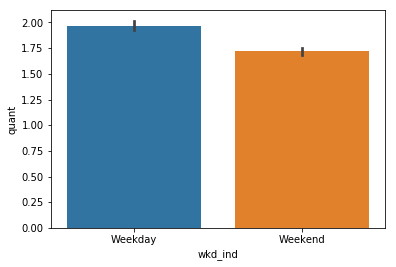

In [18]:
sns.barplot(x='wkd_ind',y='quant',data =UNIQLO2)

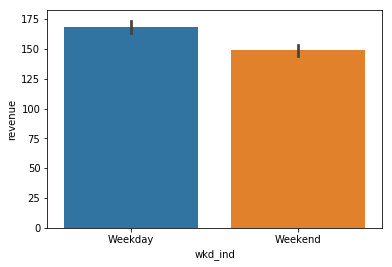

In [19]:
sns.barplot(x='wkd_ind',y='revenue',data =UNIQLO1)

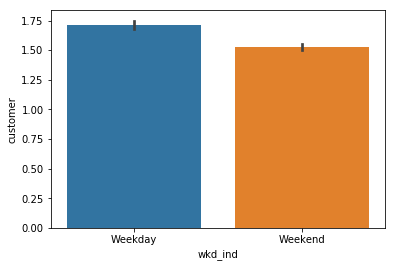

In [20]:
sns.barplot(x='wkd_ind',y='customer',data =UNIQLO1)

In [21]:
def day_avg(x):
    if x['wkd_ind'] == 'Weekday':
        x['revenue_day'] = x.revenue / 5
        x['quant_day'] = x.quant / 5
        x['customer_day'] = x.customer / 5
    else:
        x['revenue_day'] = x.revenue / 2
        x['quant_day'] = x.quant / 2
        x['customer_day'] = x.customer / 2
    return x

In [22]:
UNIQLO2 = UNIQLO2.apply(day_avg, axis=1)

In [23]:
UNIQLO2.head()

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,revenue_day,quant_day,customer_day
0,658,深圳,线下,Female,25-29,Weekday,当季新品,4,796.0,4,4,59,159.2,0.8,0.8
1,146,杭州,线下,Female,25-29,Weekday,运动,1,149.0,1,1,49,29.8,0.2,0.2
2,70,深圳,线下,Male,>=60,Weekday,T恤,2,178.0,2,2,49,35.6,0.4,0.4
3,658,深圳,线下,Female,25-29,Weekday,T恤,1,59.0,1,1,49,11.8,0.2,0.2
4,229,深圳,线下,Male,20-24,Weekend,袜子,2,65.0,2,3,9,32.5,1.5,1.0


Text(0.5,1,'不同时间段、平均每天客户人数')

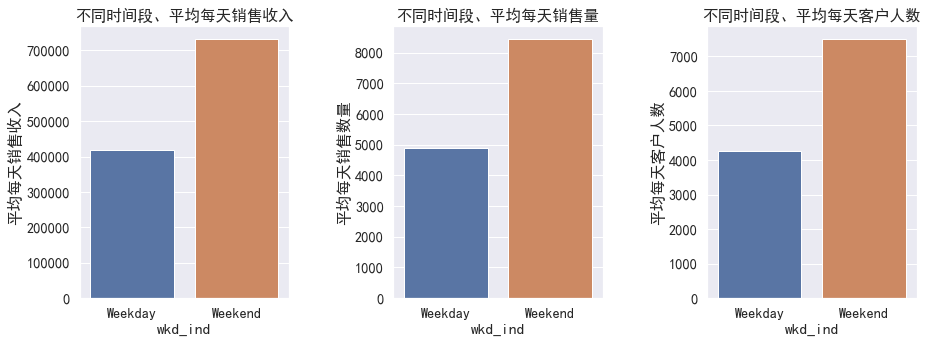

In [62]:
sns.set(font='SimHei', font_scale=1.3)

fg, ax = plt.subplots(1, 3, figsize=(15,5))
plt.subplots_adjust(wspace=0.5)
sns.barplot(x='wkd_ind',y='revenue_day',data =UNIQLO2, ax=ax[0], ci=None, estimator=sum)
ax[0].set_ylabel("平均每天销售收入")
ax[0].set_title("不同时间段、平均每天销售收入")

sns.barplot(x='wkd_ind',y='quant_day',data =UNIQLO2, ax=ax[1], ci=None, estimator=sum)
ax[1].set_ylabel("平均每天销售数量")
ax[1].set_title("不同时间段、平均每天销售量")

sns.barplot(x='wkd_ind',y='customer_day',data =UNIQLO2, ax=ax[2], ci=None, estimator=sum)
ax[2].set_ylabel("平均每天客户人数")
ax[2].set_title("不同时间段、平均每天客户人数")

In [25]:
UNIQLO2.groupby('wkd_ind')[['revenue_day','quant_day','customer_day']].sum()

,revenue_day,quant_day,customer_day
wkd_ind,,,
Weekday,418789.728,4906.0,4260.8
Weekend,731242.435,8430.0,7495.5


In [26]:
aggs = {'revenue_day':np.sum, 'quant_day':np.sum, 'customer_day':np.sum}
UNIQLO2_mean = tc.groupby_agg(UNIQLO2, ['wkd_ind'], aggs)
UNIQLO2_mean

,revenue_day,quant_day,customer_day
wkd_ind,,,
Weekday,418789.728,4906.0,4260.8
Weekend,731242.435,8430.0,7495.5


In [27]:
mean_ratio = UNIQLO2_mean.iloc[1] / UNIQLO2_mean.iloc[0]
print(mean_ratio)
mean_ratio_index = UNIQLO2_mean.index.tolist()
mean_ratio_index.append("ratio")

revenue_day     1.746085
quant_day       1.718304
customer_day    1.759177
dtype: float64


In [28]:
UNIQLO2_mean_ratio = tc.concat([UNIQLO2_mean, pd.DataFrame(mean_ratio).T])

In [29]:
UNIQLO2_mean_ratio.index = mean_ratio_index
UNIQLO2_mean_ratio

,revenue_day,quant_day,customer_day
Weekday,418789.728000,4906.000000,4260.800000
Weekend,731242.435000,8430.000000,7495.500000
ratio,1.746085,1.718304,1.759177


In [30]:
UNIQLO2_mean_ratio = tc.append(UNIQLO2_mean, mean_ratio)

In [31]:
UNIQLO2_mean_ratio.index = mean_ratio_index
UNIQLO2_mean_ratio

,revenue_day,quant_day,customer_day
Weekday,418789.728000,4906.000000,4260.800000
Weekend,731242.435000,8430.000000,7495.500000
ratio,1.746085,1.718304,1.759177


In [32]:
# 平均单个客户的消费金额、消费数量（说明：工作日 和 周末 平均每个客户的消费能力几乎相等；工作日 和 周末 只是客户数量上有差别）
# 工作日平均每天 低于 周末平均每天 是因为：周末客户数量的增加，而非周末客户消费能力的增加。
UNIQLO2_mean_ratio['revenue_day_cus'] =  UNIQLO2_mean_ratio['revenue_day'] / UNIQLO2_mean_ratio['customer_day']
UNIQLO2_mean_ratio['quant_day_cus'] =  UNIQLO2_mean_ratio['quant_day'] / UNIQLO2_mean_ratio['customer_day']
UNIQLO2_mean_ratio

,revenue_day,quant_day,customer_day,revenue_day_cus,quant_day_cus
Weekday,418789.728000,4906.000000,4260.800000,98.288990,1.151427
Weekend,731242.435000,8430.000000,7495.500000,97.557526,1.124675
ratio,1.746085,1.718304,1.759177,0.992558,0.976766


In [33]:
# 拓展：从不同城市、渠道、性别 看 时间与销售额的关系

Text(0.5,1,'不同性别、不同时间段、平均每天销售量')

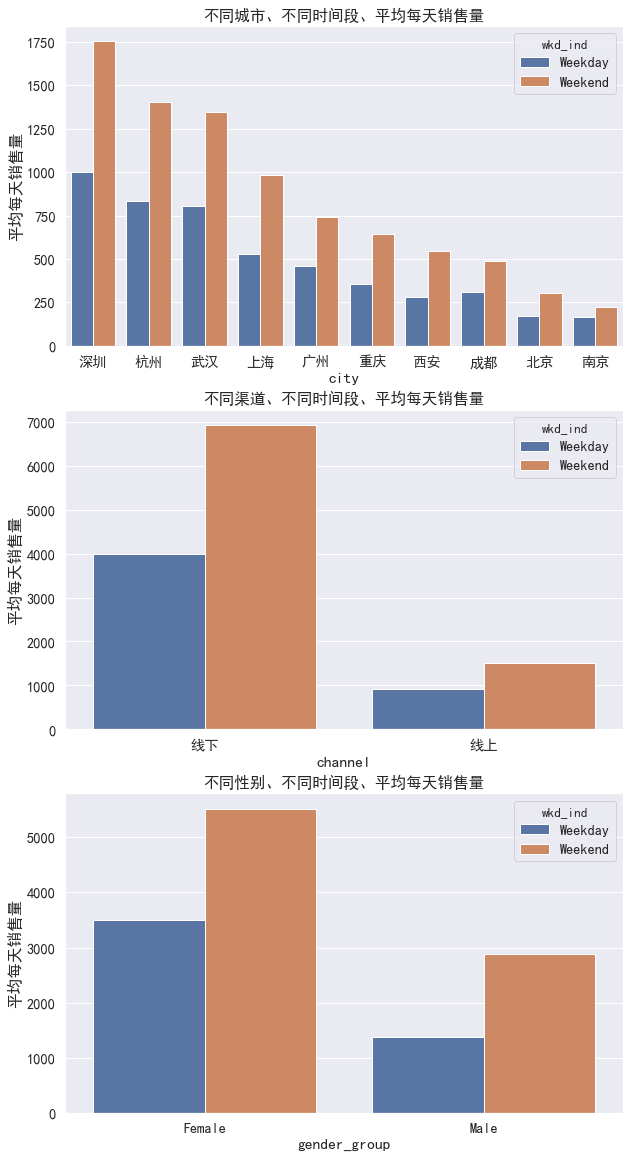

In [61]:
flg, ax = plt.subplots(3,1,figsize=(10,20))
sns.barplot(x='city',y='quant_day',hue="wkd_ind",data =UNIQLO2, ax=ax[0], ci=None, estimator=sum,
           order=UNIQLO2.groupby("city")['quant_day'].sum().sort_values(ascending=False).index
           )
ax[0].set_ylabel("平均每天销售量")
ax[0].set_title("不同城市、不同时间段、平均每天销售量")

sns.barplot(x='channel',y='quant_day',hue="wkd_ind",data =UNIQLO2, ax=ax[1], ci=None, estimator=sum)
ax[1].set_ylabel("平均每天销售量")
ax[1].set_title("不同渠道、不同时间段、平均每天销售量")

sns.barplot(x='gender_group',y='quant_day',hue="wkd_ind",data =UNIQLO2, ax=ax[2], ci=None, estimator=sum)
ax[2].set_ylabel("平均每天销售量")
ax[2].set_title("不同性别、不同时间段、平均每天销售量")

In [35]:
'''
问题二：不同产品的销售情况是怎样的？顾客偏爱哪一种购买方式？
题目拆解：
1、不同产品即指product字段中不同类别的产品，销售情况即为销售额revenue，可生成柱状图进行可视化；
2、购买方式只有channel是线上还是线下这一个指标，而顾客可以从不同性别gender_group、年龄段age_group、城市city三个维度进行分解，
因此本问即为探究不同性别、年龄段和城市的顾客对线上、线下两种购买方式的偏好，可生成柱状图进行可视化的呈现
'''

'\n问题二：不同产品的销售情况是怎样的？顾客偏爱哪一种购买方式？\n题目拆解：\n1、不同产品即指product字段中不同类别的产品，销售情况即为销售额revenue，可生成柱状图进行可视化；\n2、购买方式只有channel是线上还是线下这一个指标，而顾客可以从不同性别gender_group、年龄段age_group、城市city三个维度进行分解，\n因此本问即为探究不同性别、年龄段和城市的顾客对线上、线下两种购买方式的偏好，可生成柱状图进行可视化的呈现\n'

Text(0.5,1,'不同产品类型、不同时间段、平均每天销售额')

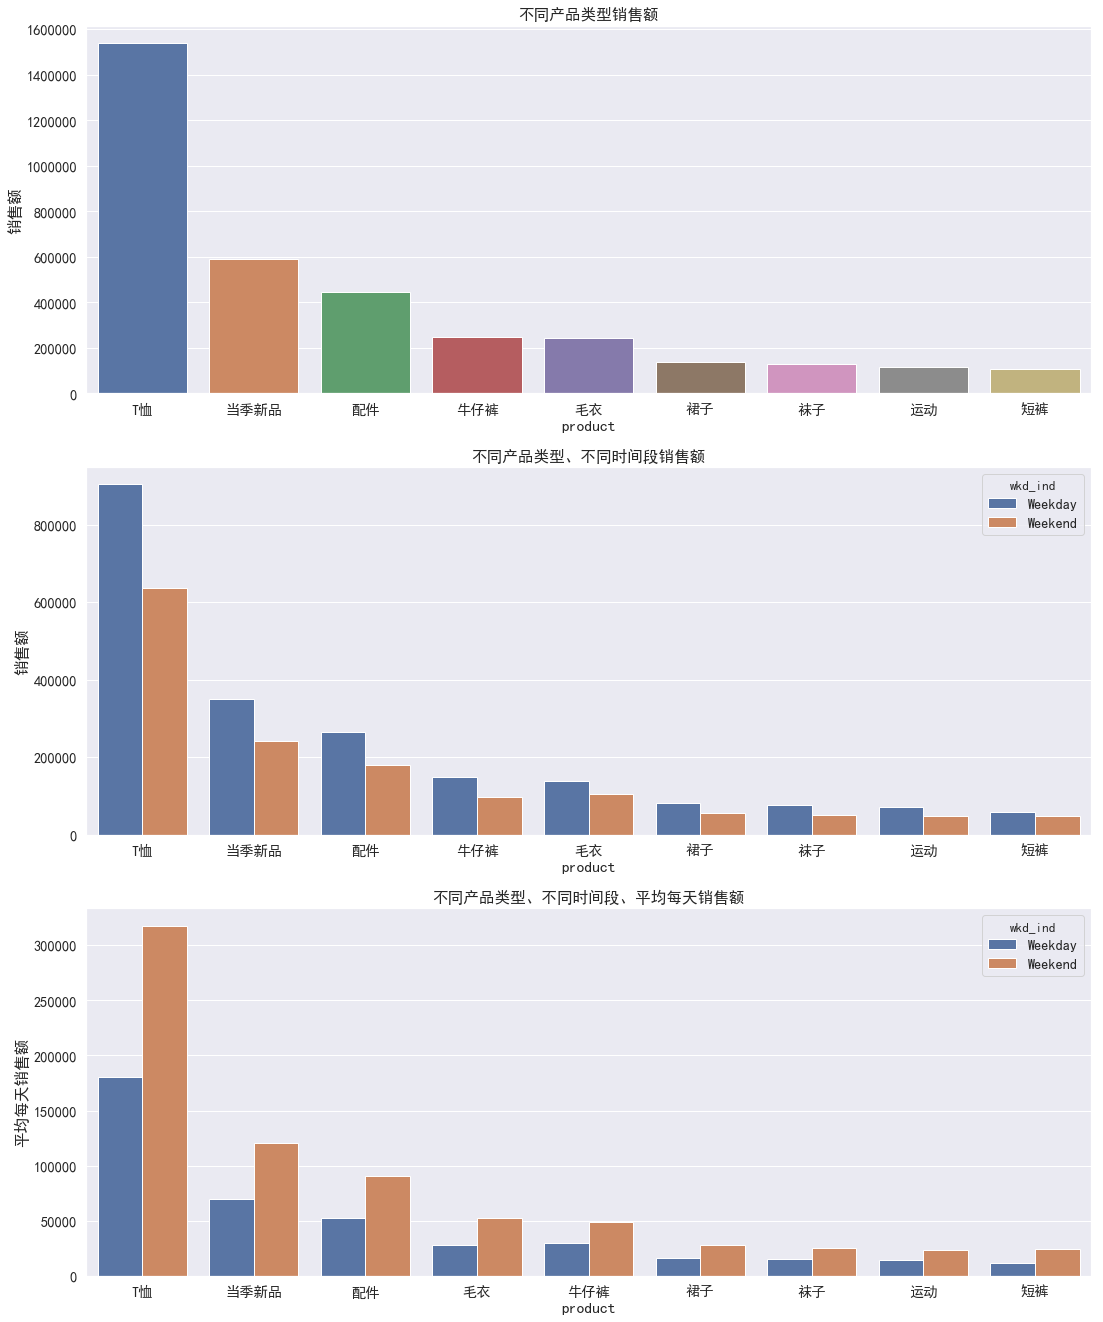

In [64]:
# 1、不同产品即指product字段中不同类别的产品，销售情况即为销售额revenue，可生成柱状图进行可视化；
fg, ax = plt.subplots(3,1,figsize=(18,23))
sns.barplot(x='product', y='revenue', data =UNIQLO2, ax=ax[0], ci=None, estimator=sum, 
           order=UNIQLO2.groupby("product")['revenue'].sum().sort_values(ascending=False).index
           )
ax[0].set_ylabel("销售额")
ax[0].set_title("不同产品类型销售额")

sns.barplot(x='product', y='revenue', hue='wkd_ind', data =UNIQLO2, ax=ax[1], ci=None, estimator=sum, 
           order=UNIQLO2.groupby("product")['revenue'].sum().sort_values(ascending=False).index
           )
ax[1].set_ylabel("销售额")
ax[1].set_title("不同产品类型、不同时间段销售额")

sns.barplot(x='product', y='revenue_day', hue='wkd_ind', data =UNIQLO2, ax=ax[2], ci=None, estimator=sum, 
           order=UNIQLO2.groupby("product")['revenue_day'].sum().sort_values(ascending=False).index
           )
ax[2].set_ylabel("平均每天销售额")
ax[2].set_title("不同产品类型、不同时间段、平均每天销售额")

Text(0.5,1,'不同产品类型、不同渠道、平均每天销售额')

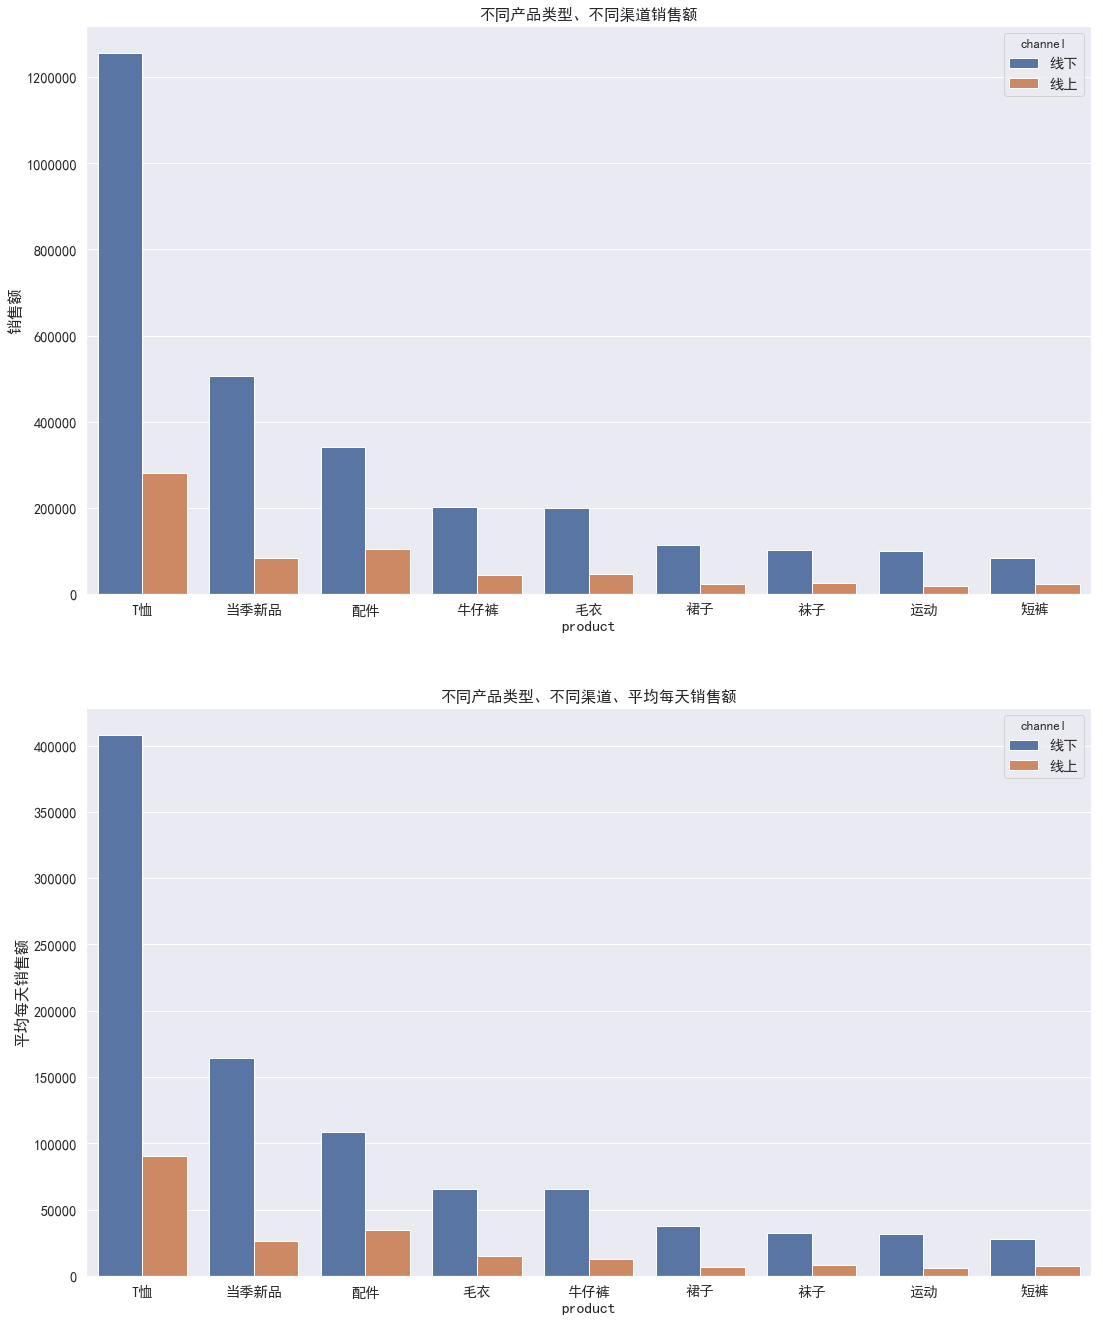

In [59]:
fg, ax = plt.subplots(2,1,figsize=(18,23))
sns.barplot(x='product', y='revenue', hue='channel', data =UNIQLO2, ax=ax[0], ci=None, estimator=sum, 
           order=UNIQLO2.groupby("product")['revenue'].sum().sort_values(ascending=False).index
           )
ax[0].set_ylabel("销售额")
ax[0].set_title("不同产品类型、不同渠道销售额")

sns.barplot(x='product', y='revenue_day', hue='channel', data =UNIQLO2, ax=ax[1], ci=None, estimator=sum, 
           order=UNIQLO2.groupby("product")['revenue_day'].sum().sort_values(ascending=False).index
           )
ax[1].set_ylabel("平均每天销售额")
ax[1].set_title("不同产品类型、不同渠道、平均每天销售额")

Text(0.5,1,'不同商品类别、不同年龄段销售额')

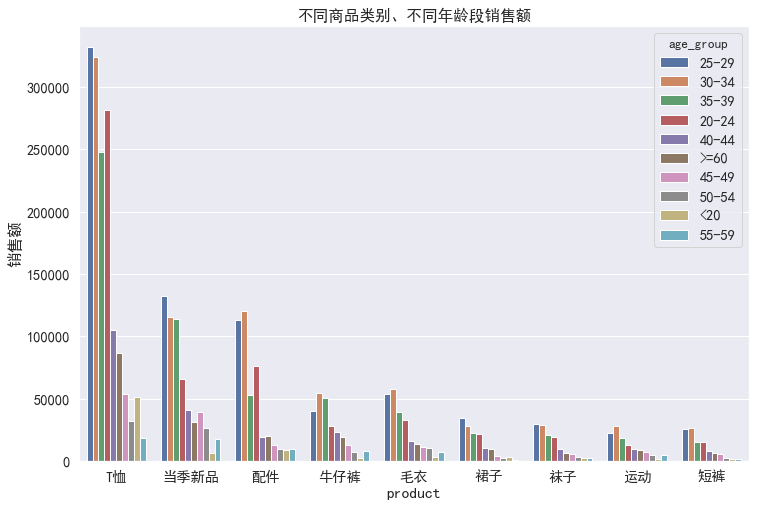

In [60]:
plt.figure(figsize=(12,8))
s1_order_product= UNIQLO2.groupby('product')['revenue'].sum().sort_values(ascending=False).index
s1_order_age_group = UNIQLO2.groupby('age_group')['revenue'].sum().sort_values(ascending=False).index

sns.barplot(x='product', y='revenue', hue='age_group', data =UNIQLO2, ci=None, estimator=sum, 
           order=s1_order_product,
           hue_order=s1_order_age_group
           )
plt.ylabel("销售额")
plt.title("不同商品类别、不同年龄段销售额")

Text(0.5,1,'不同商品类别、不同城市销售额')

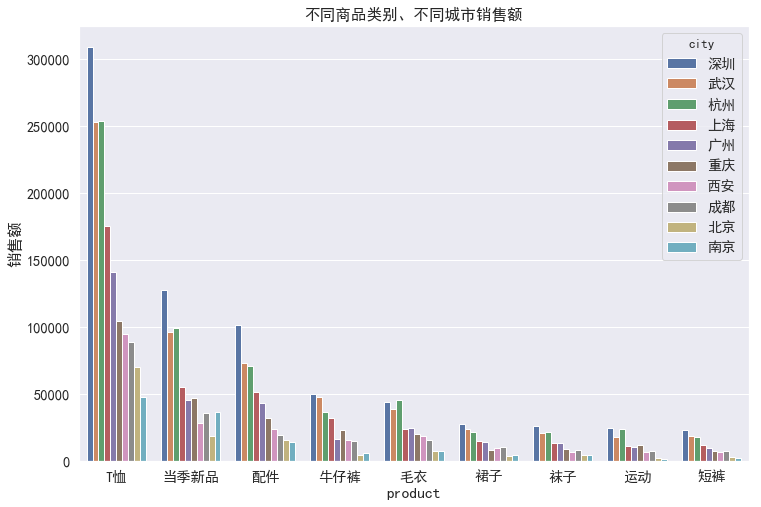

In [63]:
plt.figure(figsize=(12,8))
s1_order_product= UNIQLO2.groupby('product')['revenue'].sum().sort_values(ascending=False).index
s1_order_age_city = UNIQLO2.groupby('city')['revenue'].sum().sort_values(ascending=False).index

sns.barplot(x='product', y='revenue', hue='city', data =UNIQLO2, ci=None, estimator=sum, 
           order=s1_order_product,
           hue_order=s1_order_age_city
           )
plt.ylabel("销售额")
plt.title("不同商品类别、不同城市销售额")

Text(0.5,1,'不同城市、不同渠道销售额')

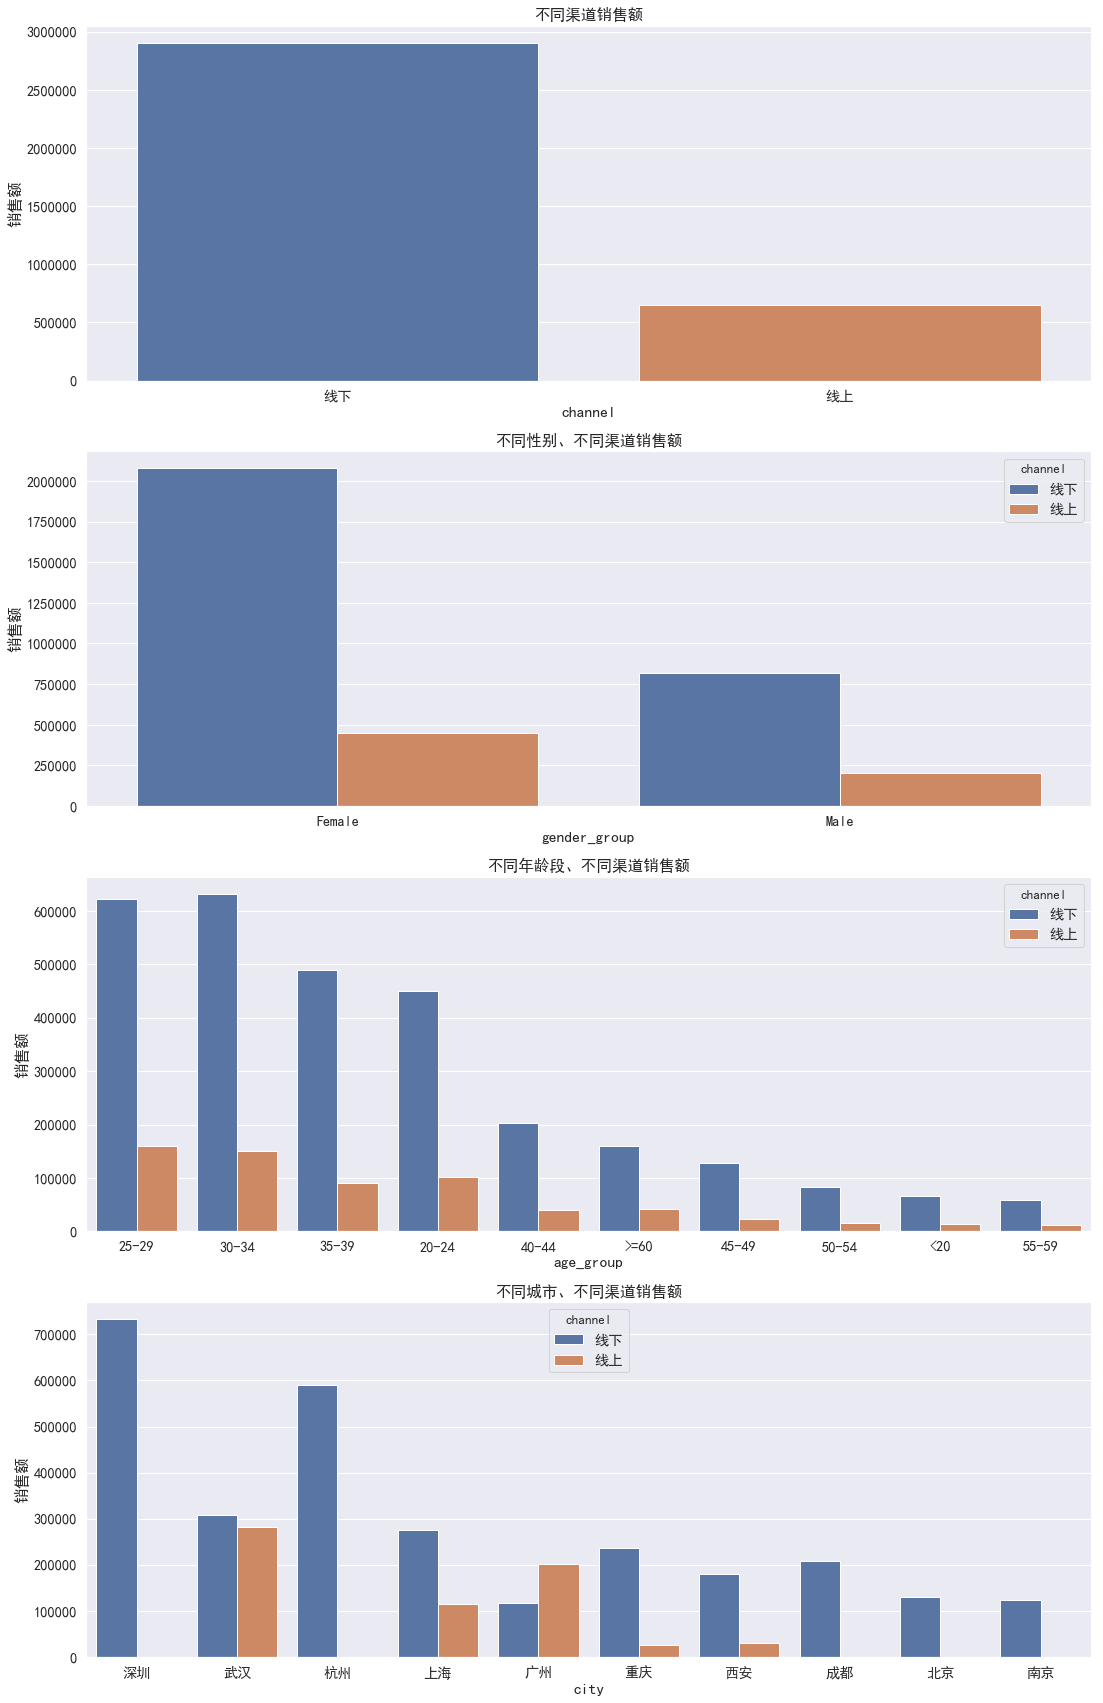

In [47]:
# 2、购买方式只有channel是线上还是线下这一个指标，而顾客可以从不同性别gender_group、年龄段age_group、城市city三个维度进行分解
fg, ax = plt.subplots(4,1,figsize=(18,30))
sns.barplot(x='channel', y='revenue', data =UNIQLO2, ax=ax[0], ci=None, estimator=sum)
ax[0].set_ylabel("销售额")
ax[0].set_title("不同渠道销售额")

sns.barplot(x='gender_group', y='revenue', hue='channel', data =UNIQLO2, ax=ax[1], ci=None, estimator=sum)
ax[1].set_ylabel("销售额")
ax[1].set_title("不同性别、不同渠道销售额")

sns.barplot(x='age_group', y='revenue', hue='channel', data =UNIQLO2, ax=ax[2], ci=None, estimator=sum, 
           order=UNIQLO2.groupby("age_group")['revenue'].sum().sort_values(ascending=False).index
           )
ax[2].set_ylabel("销售额")
ax[2].set_title("不同年龄段、不同渠道销售额")

sns.barplot(x='city', y='revenue', hue='channel', data =UNIQLO2, ax=ax[3], ci=None, estimator=sum, 
           order=UNIQLO2.groupby("city")['revenue'].sum().sort_values(ascending=False).index
           )
ax[3].set_ylabel("销售额")
ax[3].set_title("不同城市、不同渠道销售额")

In [39]:
# 发现一个有趣现象：只有[武汉、上海、广州、重庆、西安] 有线上销售额；所以去研究一下这几个城市的线上来源的年龄段问题：为什么其他城市没有线上销售？
UNIQLO2_s1 = UNIQLO2[UNIQLO2['city'].isin(['武汉','上海','广州','重庆','西安']) & (UNIQLO2['channel'] == '线上')]
UNIQLO2_s1.head()

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,revenue_day,quant_day,customer_day
5,28,武汉,线上,Female,35-39,Weekend,T恤,1,97.0,1,1,49,48.5,0.5,0.5
16,32,武汉,线上,Male,35-39,Weekend,短裤,2,79.0,2,2,19,39.5,1.0,1.0
20,420,广州,线上,Male,>=60,Weekday,T恤,1,39.0,1,1,49,7.8,0.2,0.2
25,375,广州,线上,Female,45-49,Weekday,当季新品,1,79.0,1,1,59,15.8,0.2,0.2
30,68,重庆,线上,Female,50-54,Weekend,短裤,2,106.0,2,3,19,53.0,1.5,1.0


Text(0.5,1,'不同城市、不同年龄段、线上销售额')

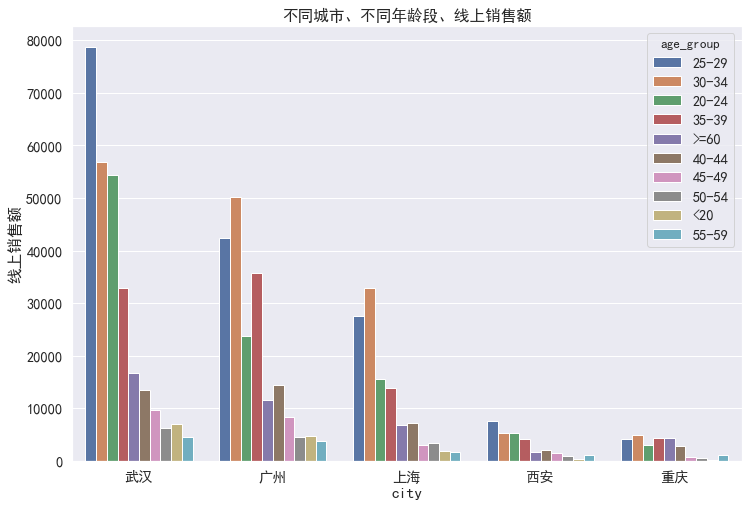

In [65]:
plt.figure(figsize=(12,8))
s1_order_city = UNIQLO2_s1.groupby('city')['revenue'].sum().sort_values(ascending=False).index
s1_order_age = UNIQLO2_s1.groupby('age_group')['revenue'].sum().sort_values(ascending=False).index

sns.barplot(x='city', y='revenue', hue='age_group', data =UNIQLO2_s1, ci=None, estimator=sum, 
           order=s1_order_city,
           hue_order=s1_order_age
           )
plt.ylabel("线上销售额")
plt.title("不同城市、不同年龄段、线上销售额")

Text(0.5,1,'不同城市、不同商品类别、线上销售额')

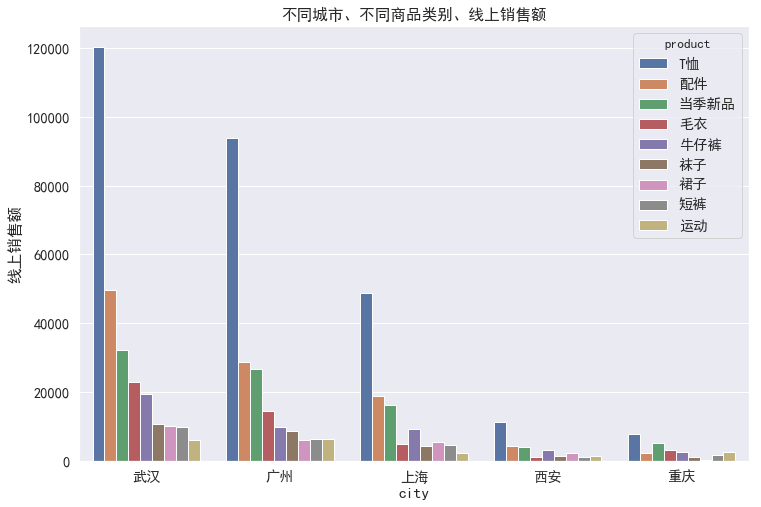

In [66]:
plt.figure(figsize=(12,8))
s1_order_city = UNIQLO2_s1.groupby('city')['revenue'].sum().sort_values(ascending=False).index
s1_order_product = UNIQLO2_s1.groupby('product')['revenue'].sum().sort_values(ascending=False).index

sns.barplot(x='city', y='revenue', hue='product', data =UNIQLO2_s1, ci=None, estimator=sum, 
           order=s1_order_city,
           hue_order=s1_order_product
           )
plt.ylabel("线上销售额")
plt.title("不同城市、不同商品类别、线上销售额")

In [ ]:
'''
问题三：销售额和产品成本之间的关系怎么样？
题目拆解：
每单顾客的总销售额为revenue，根据数量quant可以计算出单件产品销售金额，又已知单件产品成本为unit_cost和其类别product。
思路一：单件产品销售额-成本=利润margin，margin是如何分布的？是否存在亏本销售的产品？
思路二：探究实际销售额和产品成本之间的关系，即为求它们之间的相关，若成正相关，则产品成本越高，销售额越高，或许为高端商品；
若成负相关，则成本越低，销售额越高，为薄利多销的模式。
还可以拆分得更细，探究不同城市和门店中成本和销售额的相关性。
'''

In [67]:
# 1、单件产品销售额-成本=利润margin，margin是如何分布的？是否存在亏本销售的产品？
UNIQLO2['margins'] = UNIQLO2['revenue'] - UNIQLO2['unit_cost']*UNIQLO2['quant'] # 利润
UNIQLO2['margins_per'] = UNIQLO2['margins']/UNIQLO2['quant'] # 单件利润
UNIQLO2.head(10)

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,revenue_day,quant_day,customer_day,margins,margins_per
0,658,深圳,线下,Female,25-29,Weekday,当季新品,4,796.0,4,4,59,159.2,0.8,0.8,560.0,140.000000
1,146,杭州,线下,Female,25-29,Weekday,运动,1,149.0,1,1,49,29.8,0.2,0.2,100.0,100.000000
2,70,深圳,线下,Male,>=60,Weekday,T恤,2,178.0,2,2,49,35.6,0.4,0.4,80.0,40.000000
3,658,深圳,线下,Female,25-29,Weekday,T恤,1,59.0,1,1,49,11.8,0.2,0.2,10.0,10.000000
4,229,深圳,线下,Male,20-24,Weekend,袜子,2,65.0,2,3,9,32.5,1.5,1.0,38.0,12.666667
5,28,武汉,线上,Female,35-39,Weekend,T恤,1,97.0,1,1,49,48.5,0.5,0.5,48.0,48.000000
6,649,杭州,线下,Female,25-29,Weekend,短裤,1,33.0,1,1,19,16.5,0.5,0.5,14.0,14.000000
7,520,杭州,线下,Male,>=60,Weekend,T恤,2,158.0,2,2,49,79.0,1.0,1.0,60.0,30.000000
8,649,杭州,线下,Female,30-34,Weekend,牛仔裤,3,157.0,3,3,69,78.5,1.5,1.5,-50.0,-16.666667
9,21,北京,线下,Female,45-49,Weekend,毛衣,1,199.0,1,1,99,99.5,0.5,0.5,100.0,100.000000


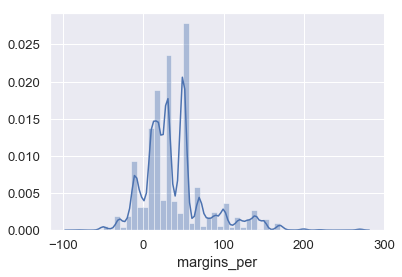

In [112]:
# 单件产品的利润的分布，存在收入为负的情况
sns.distplot(UNIQLO2['margins_per'])

In [69]:
UNIQLO2['loss'] = UNIQLO2['margins'].map(lambda x: 1 if x<0 else 0)
UNIQLO2.head(10)

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,revenue_day,quant_day,customer_day,margins,margins_per,loss
0,658,深圳,线下,Female,25-29,Weekday,当季新品,4,796.0,4,4,59,159.2,0.8,0.8,560.0,140.000000,0
1,146,杭州,线下,Female,25-29,Weekday,运动,1,149.0,1,1,49,29.8,0.2,0.2,100.0,100.000000,0
2,70,深圳,线下,Male,>=60,Weekday,T恤,2,178.0,2,2,49,35.6,0.4,0.4,80.0,40.000000,0
3,658,深圳,线下,Female,25-29,Weekday,T恤,1,59.0,1,1,49,11.8,0.2,0.2,10.0,10.000000,0
4,229,深圳,线下,Male,20-24,Weekend,袜子,2,65.0,2,3,9,32.5,1.5,1.0,38.0,12.666667,0
5,28,武汉,线上,Female,35-39,Weekend,T恤,1,97.0,1,1,49,48.5,0.5,0.5,48.0,48.000000,0
6,649,杭州,线下,Female,25-29,Weekend,短裤,1,33.0,1,1,19,16.5,0.5,0.5,14.0,14.000000,0
7,520,杭州,线下,Male,>=60,Weekend,T恤,2,158.0,2,2,49,79.0,1.0,1.0,60.0,30.000000,0
8,649,杭州,线下,Female,30-34,Weekend,牛仔裤,3,157.0,3,3,69,78.5,1.5,1.5,-50.0,-16.666667,1
9,21,北京,线下,Female,45-49,Weekend,毛衣,1,199.0,1,1,99,99.5,0.5,0.5,100.0,100.000000,0


Text(0.5,1,'不同商品类别商品利润')

<Figure size 864x576 with 0 Axes>

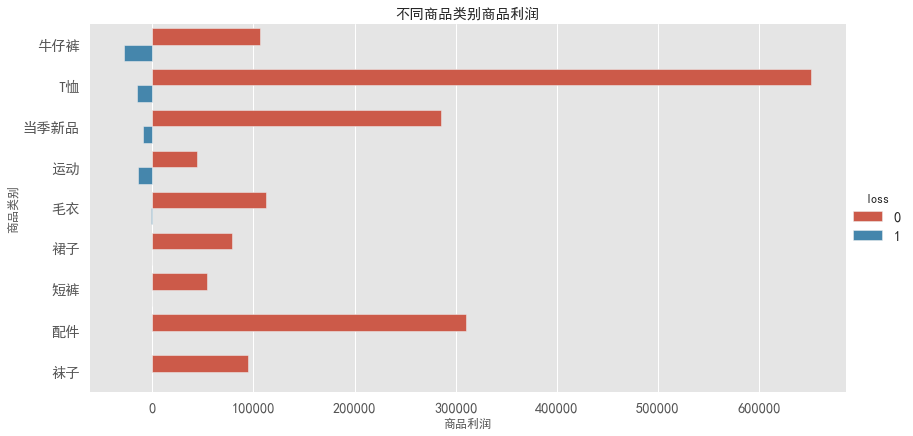

In [72]:
# 根据不同产品看其销售额、利润
plt.figure(figsize=(12,8))
plt.style.use('ggplot')

# 亏损:1、盈利:0 分别的 利润:margins
order_loss = UNIQLO2.groupby('product')['loss'].sum().sort_values(ascending=False).index # 亏损:1 所以用.sum()
sns.catplot(x='margins', y='product', hue='loss', data =UNIQLO2, ci=None, estimator=sum, kind='bar', height=6, aspect=2,
           order=order_loss,
           )
plt.xlabel("商品利润")
plt.ylabel("商品类别")
plt.title("不同商品类别商品利润")

In [73]:
UNIQLO2.groupby('product')['loss'].sum().sort_values(ascending=False)

product
牛仔裤     825
T恤      696
当季新品    653
运动      570
毛衣       24
裙子       17
短裤        1
配件        0
袜子        0
Name: loss, dtype: int64

In [79]:
UNIQLO2[UNIQLO2['loss'] == 1].groupby('product')['loss'].count().sort_values(ascending=False)

product
牛仔裤     825
T恤      696
当季新品    653
运动      570
毛衣       24
裙子       17
短裤        1
Name: loss, dtype: int64

In [87]:
# 相当于 上面的 sns.catplot(x='margins', y='product', hue='loss' ... 的 柱形图
temp_pd = pd.DataFrame(UNIQLO2.groupby(['product','loss'])['margins'].sum()).reset_index()
temp_pd

,product,loss,margins
0,T恤,0,651447.06
1,T恤,1,-14939.22
2,当季新品,0,285505.70
3,当季新品,1,-9428.82
4,毛衣,0,112623.36
5,毛衣,1,-1137.56
6,牛仔裤,0,106615.19
7,牛仔裤,1,-28157.71
8,短裤,0,53952.88
9,短裤,1,-9.00


In [98]:
# 各产品整体销售情况
pro_all = UNIQLO2.groupby('product').agg({'unit_cost':np.mean, 'quant':np.sum, 'revenue':np.sum, 'margins':np.sum})
pro_all['margins_per'] = pro_all['margins'] / pro_all['quant'] # 注意：单件利润 必须重算
pro_all['margins_ratio'] = pro_all['margins_per'] / pro_all['unit_cost'] # 单件利润 / 成本均值 = 单件利润率（暂时可以理解为 销售风险：成本越大风险越大）
pro_all.sort_values(by='margins_per', ascending=False)

,unit_cost,quant,revenue,margins,margins_per,margins_ratio
product,,,,,,
毛衣,99,1355,245630.80,111485.80,82.277343,0.831084
裙子,59,995,137302.78,78597.78,78.992744,1.338860
配件,29,4621,444685.15,310676.15,67.231368,2.318323
当季新品,59,5332,590664.88,276076.88,51.777359,0.877582
T恤,49,18413,1538744.84,636507.84,34.568394,0.705477
牛仔裤,69,2430,246127.48,78457.48,32.287029,0.467928
袜子,9,3634,127731.36,95025.36,26.148971,2.905441
短裤,19,2818,107485.88,53943.88,19.142612,1.007506
运动,49,1792,118060.34,30252.34,16.881886,0.344528


In [99]:
# 销售额 和 产品成本之间的关系
pro_corr = pro_all[['revenue', 'unit_cost']].corr()
pro_corr

,revenue,unit_cost
revenue,1.000000,0.072047
unit_cost,0.072047,1.000000


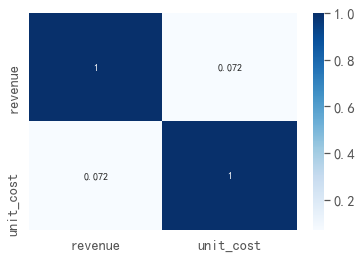

In [100]:
sns.heatmap(pro_corr,cmap='Blues',annot=True)

In [102]:
pro_all.corr()

,unit_cost,quant,revenue,margins,margins_per,margins_ratio
unit_cost,1.000000,-0.121063,0.072047,-0.022027,0.557130,-0.632740
quant,-0.121063,1.000000,0.971797,0.941363,-0.193183,-0.098468
revenue,0.072047,0.971797,1.000000,0.973502,-0.017938,-0.191533
margins,-0.022027,0.941363,0.973502,1.000000,0.078846,-0.013034
margins_per,0.557130,-0.193183,-0.017938,0.078846,1.000000,0.142317
margins_ratio,-0.632740,-0.098468,-0.191533,-0.013034,0.142317,1.000000


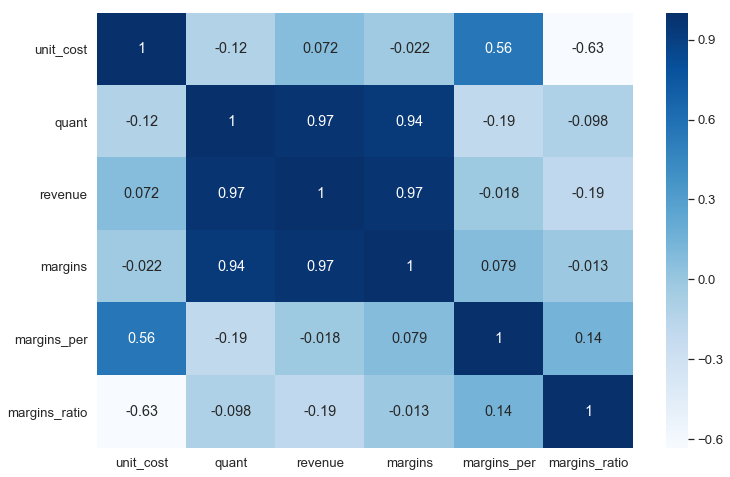

In [107]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.2)
ax_corr_all = sns.heatmap(pro_all.corr(),cmap='Blues',annot=True)